# Lead Scoring Case Study Assignment

In [1]:
# importing required Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Loading  and Cleaning Data

In [2]:
# loading data
Ls_data = pd.read_csv('Leads.csv')
Ls_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
# shape of the dataframe
Ls_data.shape

(9240, 37)

In [4]:
Ls_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
Ls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Given that we have 'Select' as Categorical variable. Converting these into Nulls 
# the reason it is converted into Null is that people did not want to either select any value from the list or they just left it at default. which could be set to select
Ls_data = Ls_data.replace('Select', np.nan)

In [7]:
# Finding Null values in data
round((Ls_data.isnull().sum()/len(Ls_data))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Cleaning and Formatting Data

In [8]:
# Dropping columns which have more than 30% null values
Ls_data.drop(Ls_data.columns[round((Ls_data.isnull().sum()/len(Ls_data))*100,2)>30], axis=1, inplace=True)
##['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

In [9]:
Ls_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

#### We will keep rest of the columns with null values as the values are less than 30% and most of these column can play important role in our regression model and analysis. We will individually work on imputing values in these missing entried by various methods ahead

In [10]:
# imputing the missing value for lead source column
Ls_data['Lead Source'] = Ls_data['Lead Source'].replace('google','Google')
Ls_data['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [11]:
# Since google is appering heighest time we will fill the missing values with google 
Ls_data['Lead Source'] = Ls_data['Lead Source'].fillna(Ls_data['Lead Source'].mode()[0])

In [12]:
# Filling Missing values for TotalVisits columns
# since this is a numerical column and as per the descibe function output we are clear that this has outliers so we will be using meadian to fill in the missing values.
Ls_data['TotalVisits'] = Ls_data['TotalVisits'].fillna(Ls_data['TotalVisits'].median())

In [13]:
# Filling Missing values for Page view per visit column
# since this is a numerical column and as per the descibe function output we are clear that this has outliers so we will be using meadian to fill in the missing values.
Ls_data['Page Views Per Visit'] = Ls_data['Page Views Per Visit'].fillna(Ls_data['Page Views Per Visit'].median())

In [14]:
# filling missing value for last activity column
Ls_data['Last Activity'] = Ls_data['Last Activity'].fillna(Ls_data['Last Activity'].mode()[0])

#### Since rest of the column with null values have hiegher number of null values so insted of replacing them using imputation method we will assign Not Given to the null values as filling these null values with a value may affect our analysis and affect the final model and its usebility.

In [15]:
Ls_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [16]:
# Remaining columns which have heigher null values 
null_columns = Ls_data.columns[Ls_data.isnull().sum()>0]

In [17]:
# Filling 'not given' in the null values of the columns which have heigher null values.
for column in null_columns:
    Ls_data[column] = Ls_data[column].fillna('Not Given')

In [18]:
# Converting Yes/No variable to 1 and 0 for analysis purpose

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Ls_data[varlist] = Ls_data[varlist].apply(binary_map)

In [19]:
Ls_data.describe()

Lead Number  Do Not Email  Do Not Call    Converted  TotalVisits  \
count    9240.000000   9240.000000  9240.000000  9240.000000  9240.000000   
mean   617188.435606      0.079437     0.000216     0.385390     3.438636   
std     23405.995698      0.270435     0.014711     0.486714     4.819024   
min    579533.000000      0.000000     0.000000     0.000000     0.000000   
25%    596484.500000      0.000000     0.000000     0.000000     1.000000   
50%    615479.000000      0.000000     0.000000     0.000000     3.000000   
75%    637387.250000      0.000000     0.000000     1.000000     5.000000   
max    660737.000000      1.000000     1.000000     1.000000   251.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9240.000000           9240.000000  9240.000000   
mean                    487.698268              2.357440     0.001515   
std                     548.021466              2.145781     0.038898   
min                       0.000000              0.000000     0.000000   
25%                      12.000000              1.000000     0.000000   
50%                     248.000000              2.000000     0.000000   
75%                     936.000000              3.000000     0.000000   
max                    2272.000000             55.000000     1.000000   

       Magazine  Newspaper Article  X Education Forums    Newspaper  \
count    9240.0        9240.000000         9240.000000  9240.000000   
mean        0.0           0.000216            0.000108     0.000108   
std         0.0           0.014711            0.010403     0.010403   
min         0.0           0.000000            0.000000     0.000000   
25%         0.0           0.000000            0.000000     0.000000   
50%         0.0           0.000000            0.000000     0.000000   
75%         0.0           0.000000            0.000000     0.000000   
max         0.0           1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  \
count            9240.000000              9240.000000   
mean                0.000433                 0.000758   
std                 0.020803                 0.027515   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       Receive More Updates About Our Courses  \
count                                  9240.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9240.0                     9240.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9240.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max          

#### from above describe we can clearly see that there are some variables which have just one value. either yes or no. for ex: Magzine has 9240 non null values and all of them are no. similarly we have other columns as well ..we will remove these column from analysis as they will not contribute anything positive to the analysis and will affect model accuracy and other parameters.

In [20]:
# dropping all the columns which have only 1 value as mentioned above. 
Ls_data.drop(Ls_data.columns[Ls_data.nunique()==1], axis=1, inplace=True)

In [21]:
# finding the distinct or unique items in each column of dataframe
Ls_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

#### there are still some columns which have only 2 unique values in them. we need to check these values are distributted normally or one value records are really heigher than other, if this is the case then we need to drop these columns as these columns are skewed and will affect the model prediction and accuracy.

In [22]:
# selecting the columns which have 2 unique values and finding the data distribution btw the 2 values
col_list = Ls_data.columns[Ls_data.nunique()==2]
for col in col_list:
    print(Ls_data[col].value_counts(normalize=True))
    print('-'*50)

Do Not Email
0    0.920563
1    0.079437
Name: proportion, dtype: float64
--------------------------------------------------
Do Not Call
0    0.999784
1    0.000216
Name: proportion, dtype: float64
--------------------------------------------------
Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64
--------------------------------------------------
Search
0    0.998485
1    0.001515
Name: proportion, dtype: float64
--------------------------------------------------
Newspaper Article
0    0.999784
1    0.000216
Name: proportion, dtype: float64
--------------------------------------------------
X Education Forums
0    0.999892
1    0.000108
Name: proportion, dtype: float64
--------------------------------------------------
Newspaper
0    0.999892
1    0.000108
Name: proportion, dtype: float64
--------------------------------------------------
Digital Advertisement
0    0.999567
1    0.000433
Name: proportion, dtype: float64
----------------------------------------------

#### Except `Converted` (Target Variable) and `A free copy of Mastering The Interview` column rest all column are highly disproportionate. so we will drop these column from the dataframe.

In [23]:
Ls_data.drop(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis=1, inplace=True)

#### Also column `Prospect ID` and `Lead Number` are of no use for the analysis as these are unique number and assigned to each lead recieved.

In [24]:
Ls_data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

#### checking for theoutliers in the reamining dataset. |

In [25]:
Ls_data.describe(percentiles=[.25,.5,.75,.9,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    17.000000                  1840.610000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9240.000000                             9240.000000  
mean               2.357440                                0.312554  
std                2.145781                                0.463559  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                9.000000                                1.000000  
max               55.000000                                1.000000

- as seen from above data TotalVisits, Page views per visit both have outliers so lets analyse the outliers in `TotalVIsits` first.

In [26]:
# Since Totalvisit has outlier lets remove the data above 99th percentile. bcs from the above table we can see data till 99th %tile is well under intequartile range
per_99 = Ls_data.TotalVisits.quantile(.99) #getting 99th percentile value
Ls_data = Ls_data[Ls_data.TotalVisits<=per_99]
Ls_data.describe(percentiles=[.25,.5,.75,.9,.95,.99])  #Checking %tile again after removing rows

Converted  TotalVisits  Total Time Spent on Website  \
count  9157.000000  9157.000000                  9157.000000   
mean      0.384951     3.203888                   486.189036   
std       0.486610     2.967759                   547.695908   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    10.000000   
50%       0.000000     3.000000                   247.000000   
75%       1.000000     5.000000                   933.000000   
90%       1.000000     7.000000                  1379.000000   
95%       1.000000     9.000000                  1559.400000   
99%       1.000000    13.000000                  1839.440000   
max       1.000000    17.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9157.000000                             9157.000000  
mean               2.332225                                0.309818  
std                2.047285                                0.462444  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                9.000000                                1.000000  
max               16.000000                                1.000000

#### - So removing the outliers from TotalVisits column has also removed the outliers from Page Views per visit as well. so now we can confidently say that the data does not have outliers

In [27]:
Ls_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9157 non-null   object 
 1   Lead Source                                    9157 non-null   object 
 2   Converted                                      9157 non-null   int64  
 3   TotalVisits                                    9157 non-null   float64
 4   Total Time Spent on Website                    9157 non-null   int64  
 5   Page Views Per Visit                           9157 non-null   float64
 6   Last Activity                                  9157 non-null   object 
 7   Country                                        9157 non-null   object 
 8   What is your current occupation                9157 non-null   object 
 9   What matters most to you in choosing a course  9157 non-n

In [28]:
# Before Creating the dummy variables lets fix country column, as shown in above chart most of the people are from 'India' and all the 'Null' values are assigned to 'Not Given' Category so we can club all the other countries into one category as 'Other        
Ls_data.Country = Ls_data.Country.apply(lambda x: x if x in ['India', 'Not Given'] else 'Outside India')

#### Now that data is cleaned and process its ready for further analysis. we will start EDA analysis to see other possible patterns in the data.

#

## 2. EDA Analysis

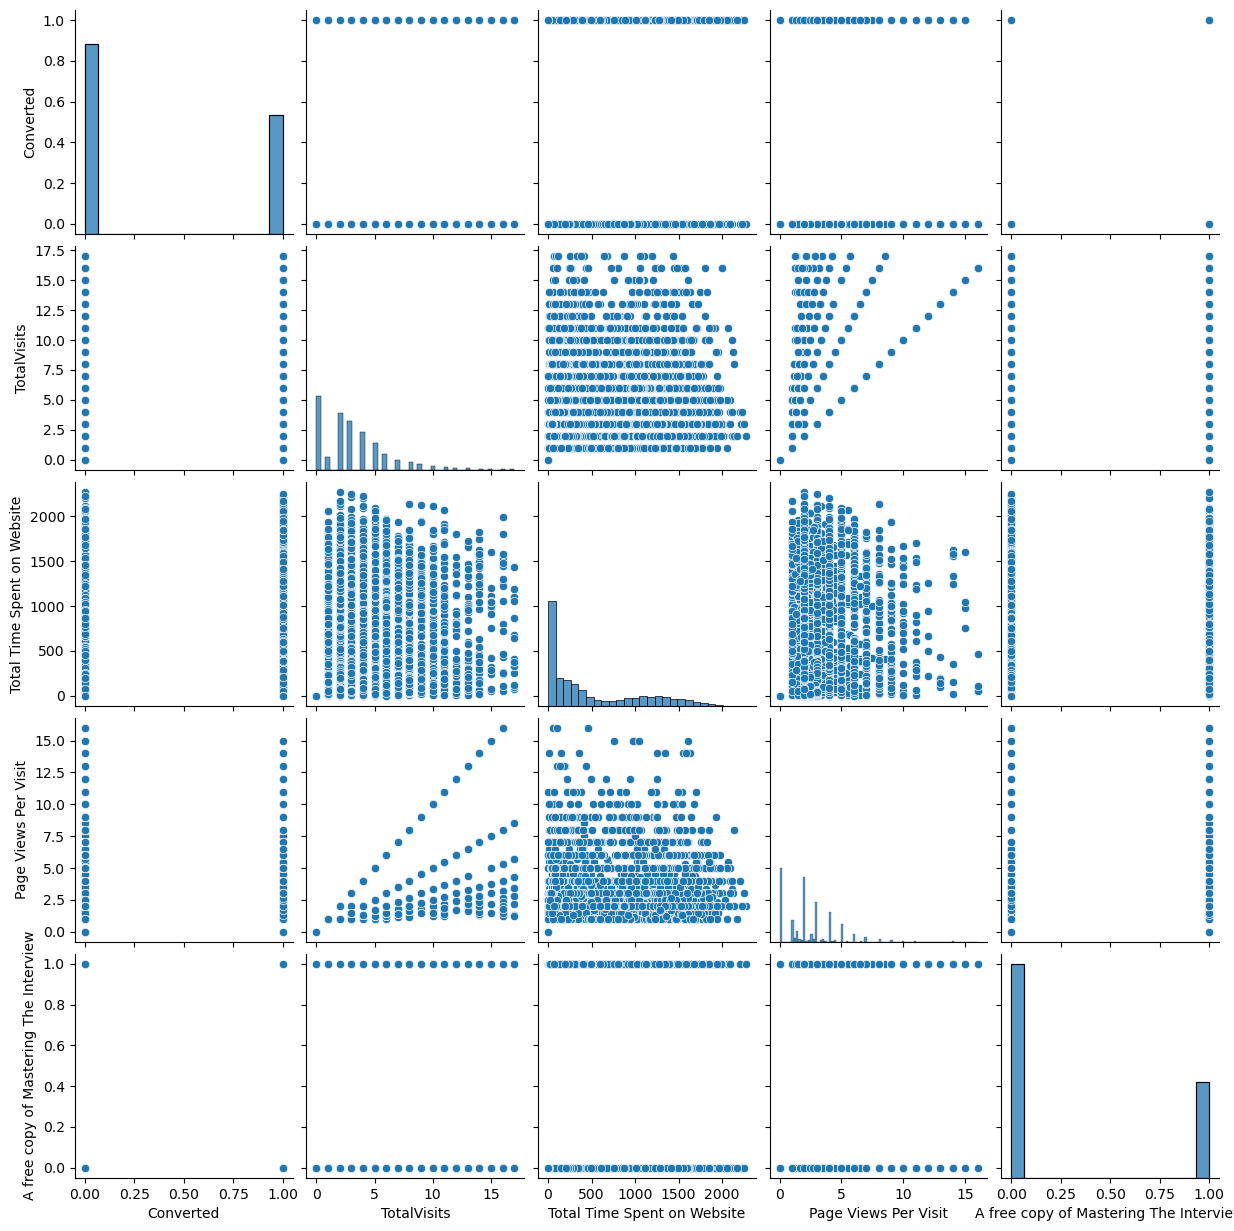

In [29]:
# Ploting pairplot to see relation between numberical variables
sns.pairplot(Ls_data)
plt.show()

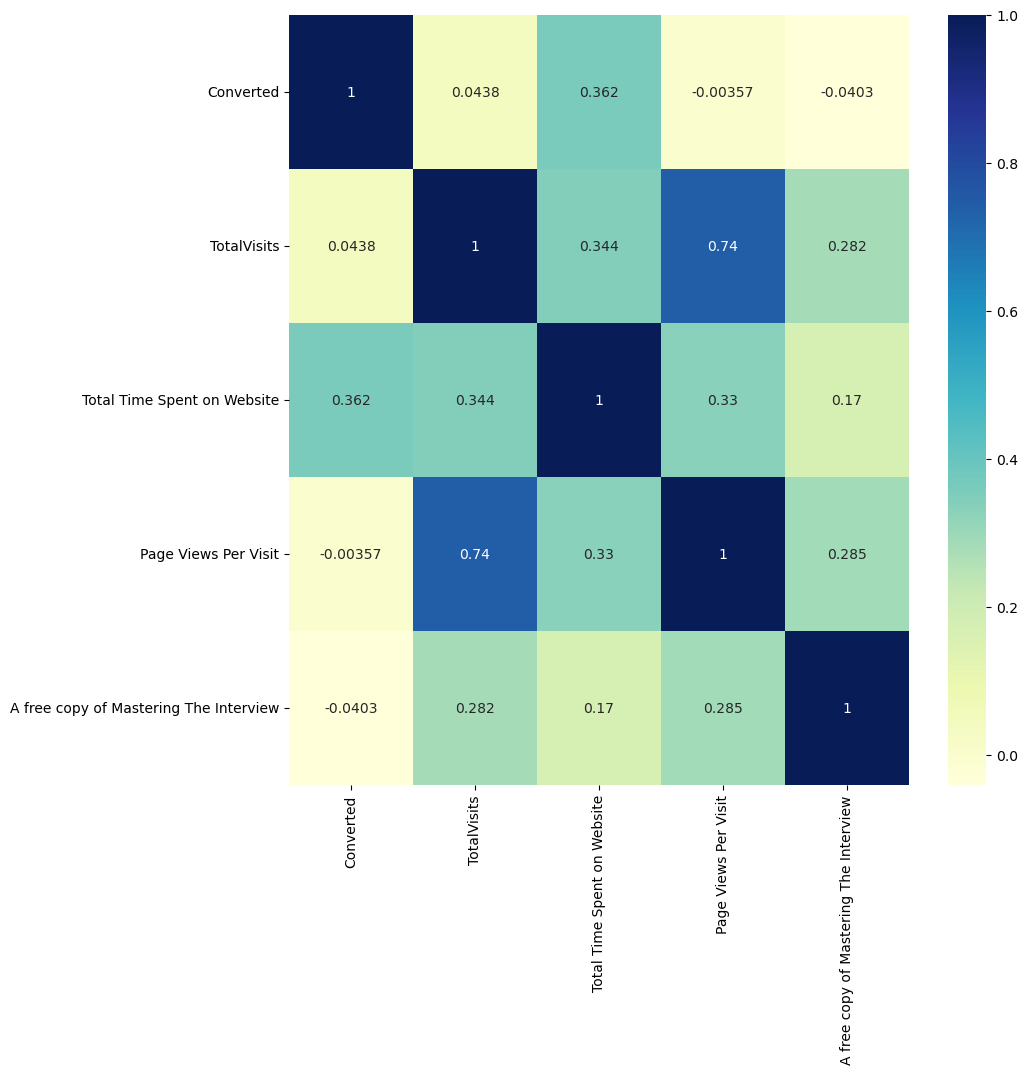

In [30]:
# Ploting heatmap correlation metric to see relation between numberical variables
plt.figure(figsize=(10,10))
sns.heatmap(Ls_data.select_dtypes(include =['int64','float64']).corr(), annot=True, fmt='0.3g', cmap = 'YlGnBu')
plt.show()

### Bivariate Analysis

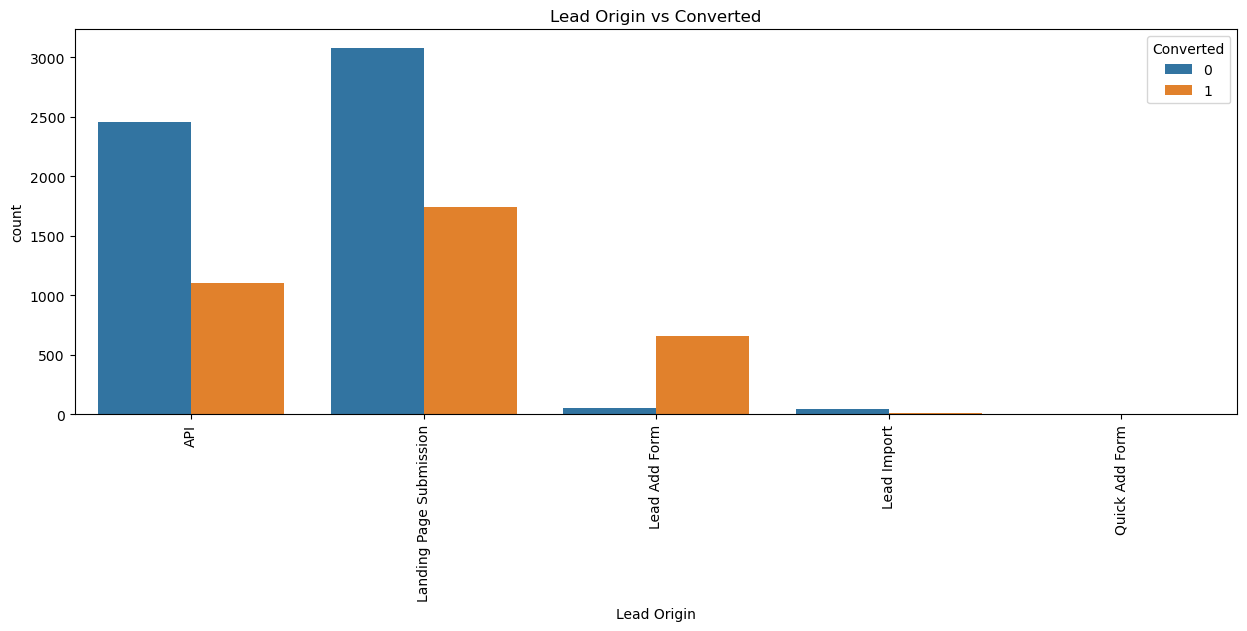

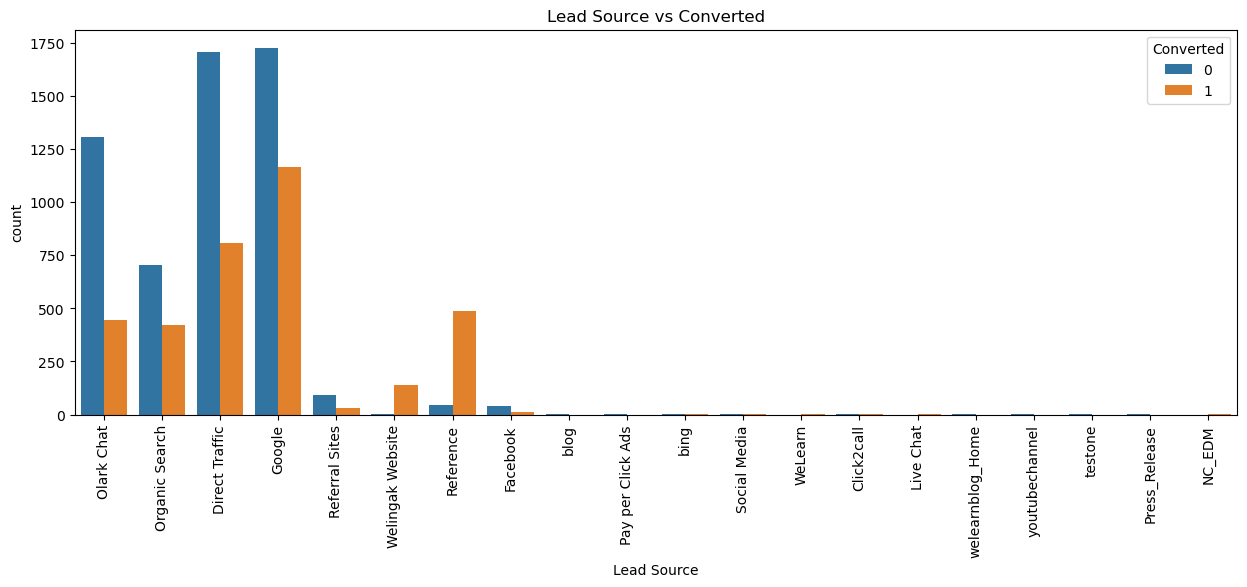

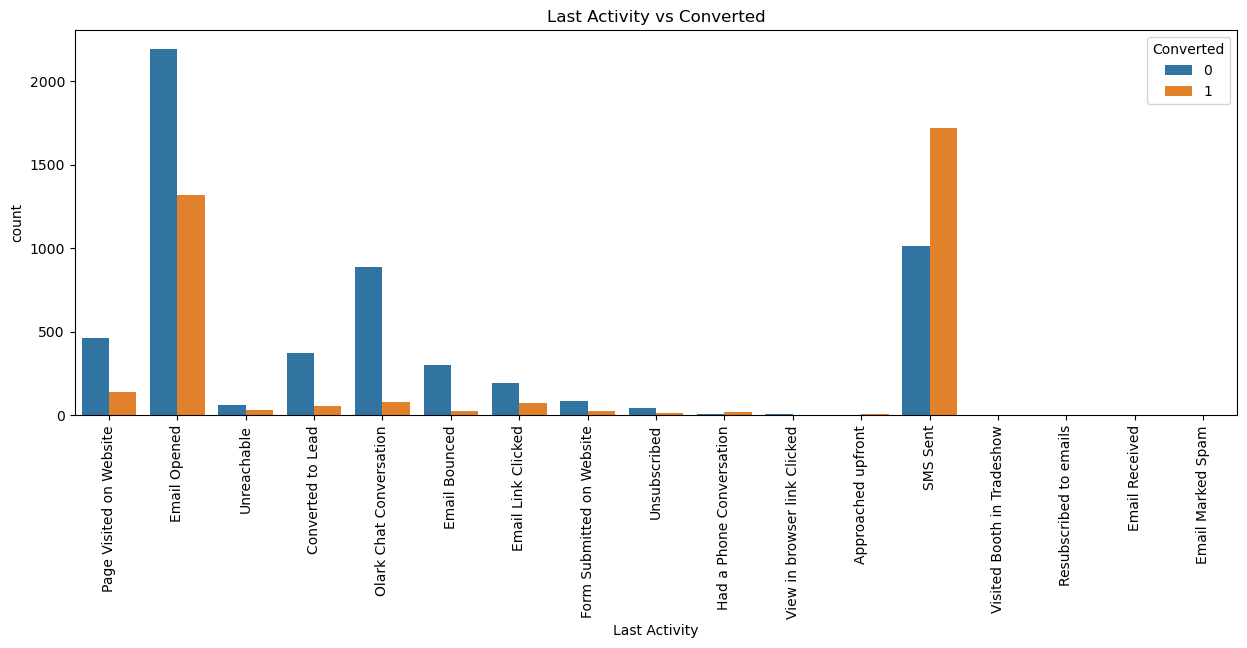

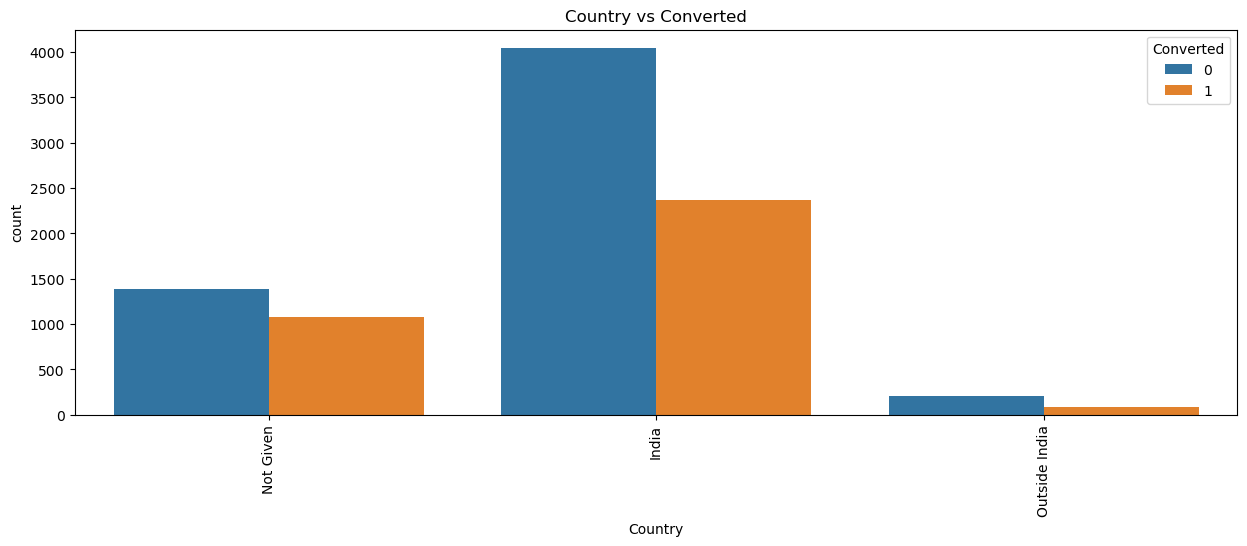

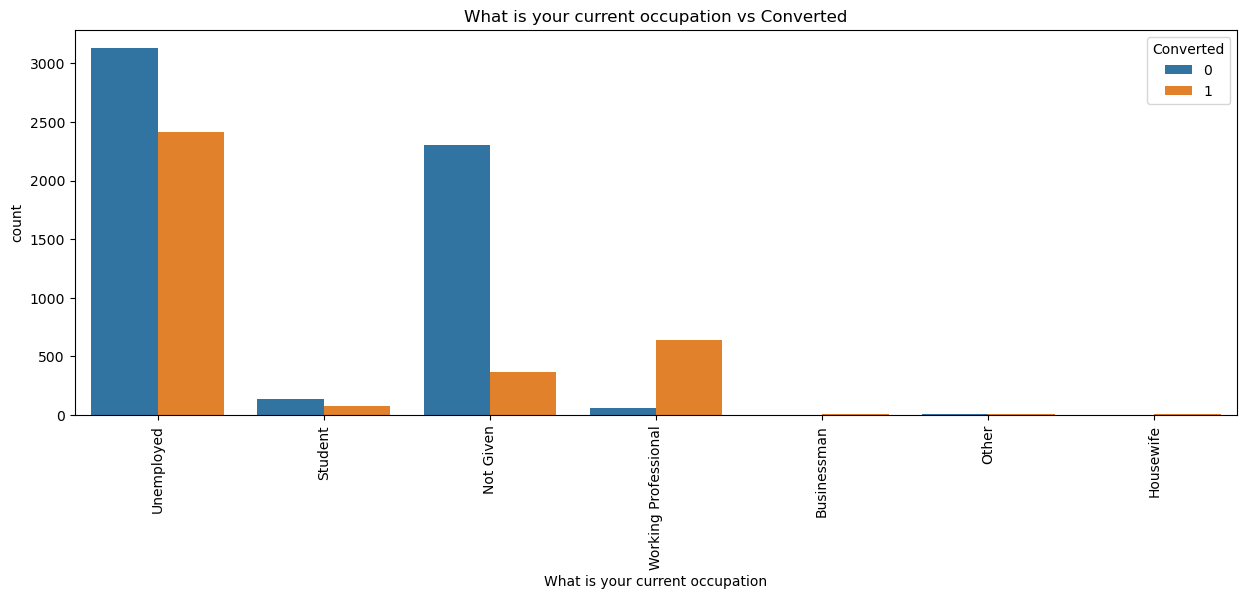

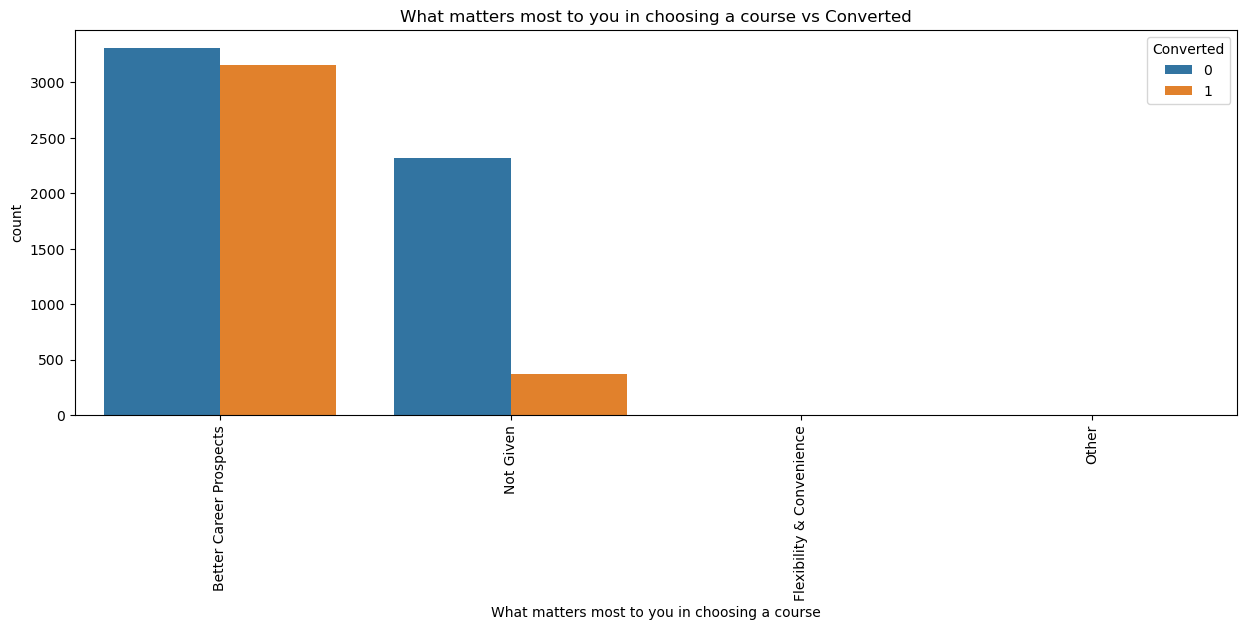

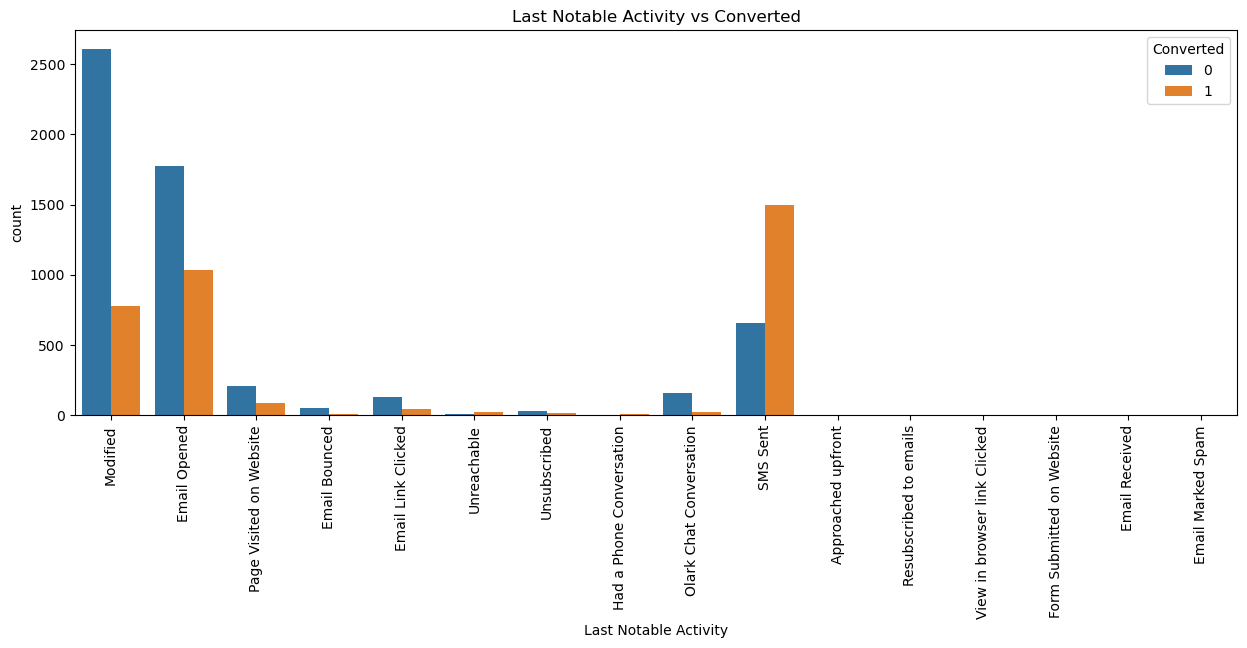

In [31]:
# Performing multivariate analysis to see the relation between different features
mla_columns = Ls_data.select_dtypes(include ="object").columns
for col in mla_columns:    
    plt.figure(figsize =(15,5))
    sns.countplot(x=Ls_data[col], hue=Ls_data.Converted)
    plt.xticks(rotation=90)
    plt.title(col+" " + 'vs Converted')
    plt.show()

### Observation
- Lead Orinated from `API` and `Landing page submission` has heighest conversion rate
- lead souced from `direct traffic` users and `google` has heighest conversion rate 
- People who are either `unemployed` or `want better career prospect` has heigher conversion rate than others

### Now that we have good understanding of the data and cleaned our data lets move to Data prepration for further analysis like Dummy variable creation etc.

#

## 3. Data Prepration

#### Since we have already converted True/False and Yes/No variable to 1/0 numerical variable. lets directly move to creation of dummy variable 

In [32]:
# Converting Categorical columns into dummy variable
obj_column = Ls_data.select_dtypes(include='object').columns
obj_column

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [33]:
Ls_data_dummy = pd.get_dummies(Ls_data[obj_column], drop_first=True)
Ls_data_dummy = Ls_data_dummy.replace({ True:1, False:0})
Ls_data_dummy

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   
...                                   ...                        ...   
9235                                    1                          0   
9236                                    1                          0   
9237                                    1                          0   
9238                                    1                          0   
9239                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
9235                        0                           0   
9236                        0                           0   
9237                        0                           0   
9238                        0                           0   
9239                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              0                     0                   0   
1                              0                     0                   0   
2                              1                     0                   0   
3                              1                     0                   0   
4                              0                     0                   1   
...                          ...                   ...                 ...   
9235                           1                     0                   0   
9236                           1                     0                   0   
9237                           1                     0                   0   
9238                           0                     0                   1   
9239                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
0                         0                   0                       1  ...   
1                         0                   0                       0  ...   
2                         0                   0                       0  ...   
3                         0                   0                       0  ...   
4                         0                   0                       0  ...   
...                     ...                 ...                     ...  ...   
9235                      0                   0                       0  ...   
9236                      0                   0                       0  ...   
9237                      0                   0                       0  ...   
9238                      0                   0                       0  ...   
9239                      0                   0                       0  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0 

In [34]:
# Joining both data frames and assigning it to new df.
Ls_data_1 = pd.concat([Ls_data, Ls_data_dummy], axis=1)
Ls_data_1

Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Traffic          1          2.0   
3     Landing Page Submission  Direct Traffic          0          1.0   
4     Landing Page Submission          Google          1          2.0   
...                       ...             ...        ...          ...   
9235  Landing Page Submission  Direct Traffic          1          8.0   
9236  Landing Page Submission  Direct Traffic          0          2.0   
9237  Landing Page Submission  Direct Traffic          0          2.0   
9238  Landing Page Submission          Google          1          3.0   
9239  Landing Page Submission  Direct Traffic          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9238                          499                  3.00   
9239                         1279                  3.00   

                Last Activity        Country What is your current occupation  \
0     Page Visited on Website      Not Given                      Unemployed   
1                Email Opened          India                      Unemployed   
2                Email Opened          India                         Student   
3                 Unreachable          India                      Unemployed   
4           Converted to Lead          India                      Unemployed   
...                       ...            ...                             ...   
9235        Email Marked Spam  Outside India                      Unemployed   
9236                 SMS Sent          India                      Unemployed   
9237                 SMS Sent          India                      Unemployed   
9238                 SMS Sent          India                       Not Given   
9239                 SMS Sent  Outside India                      Unemployed   

     What matters most to you in choosing a course  ...  \
0                          Better Career Prospects  ...   
1                          Better Career Prospects  ...   
2                          Better Career Prospects  ...   
3                          Better Career Prospects  ...   
4                          Better Career Prospects  ...   
...                                            ...  ...   
9235                       Better Career Prospects  ...   
9236                       Better Career Prospects  ...   
9237                       Better Career Prospects  ...   
9238                                     Not Given  ...   
9239                       Better Career Prospects  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0   
9237                                                0   
9238                                                0   
9239                                                0   

     Last Notable Activity_Had a Phone Conversation  \
0                     

In [35]:
# Dropping the Original variable as we have already created dummied for them.
Ls_data_1.drop(obj_column, axis=1, inplace=True)

In [36]:
pd.set_option('display.max_columns', None)
Ls_data_1.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0  

- We have created the dummy variables for categorical features and updated the dataframe with it. 
- We have removed categorical variables from the data frame.

#

## 4. Test Train Data Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# putting feature variable to X
X = Ls_data_1.drop(['Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_testone  Lead Source_welearnbl

In [39]:
# putting target variable in y
y = Ls_data_1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [40]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6409, 69)
(2748, 69)
(6409,)
(2748,)


#

## 5. Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# using Standardization method for feature scaling
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6490    -0.744597                    -0.831303             -0.647913   
4026    -0.069711                    -0.578290             -0.405762   
6453     2.967279                    -0.130933              1.773595   
8949     0.942619                    -0.594791             -0.405762   
6467     2.629836                    -0.767133              4.195103   

      A free copy of Mastering The Interview  \
6490                                       0   
4026                                       0   
6453                                       1   
8949                                       0   
6467                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6490                                    0                          0   
4026                                    0                          0   
6453                                    1                          0   
8949                                    1                          0   
6467                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
6490                        0                           0   
4026                        0                           0   
6453                        0                           0   
8949                        0                           0   
6467                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
6490                           0                     0                   1   
4026                           0                     0                   1   
6453                           1                     0                   0   
8949                           0                     0                   1   
6467                           0                     0                   1   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
6490                      0                   0                       0   
4026                      0                   0                       0   
6453                      0                   0                       0   
8949                      0                   0                       0   
6467                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
6490                           0                              0   
4026                           0                              0   
6453                           0                              0   
8949                           0                              0   
6467                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
6490                          0                      0   
4026                          0                      0   
6453                          0                      0   
8949                          0                      0   
6467                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
6490                           0                         0   
4026                           0                         0   
6453                           0                         0   
8949                           0                         0   
6467                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
6490                    0                             0                 0   
4026                    0                             0                 0   
6453                    0                             0                 0   
8949                    0                             0                 0   
6467                    0                             

In [43]:
### Checking the converstion rate to see the imbalance in the data

(sum(Ls_data_1.Converted)/len(Ls_data_1.Converted.index))*100

38.49514032980233

#### We have Close to 39% Converted rate

### Looking at correlations

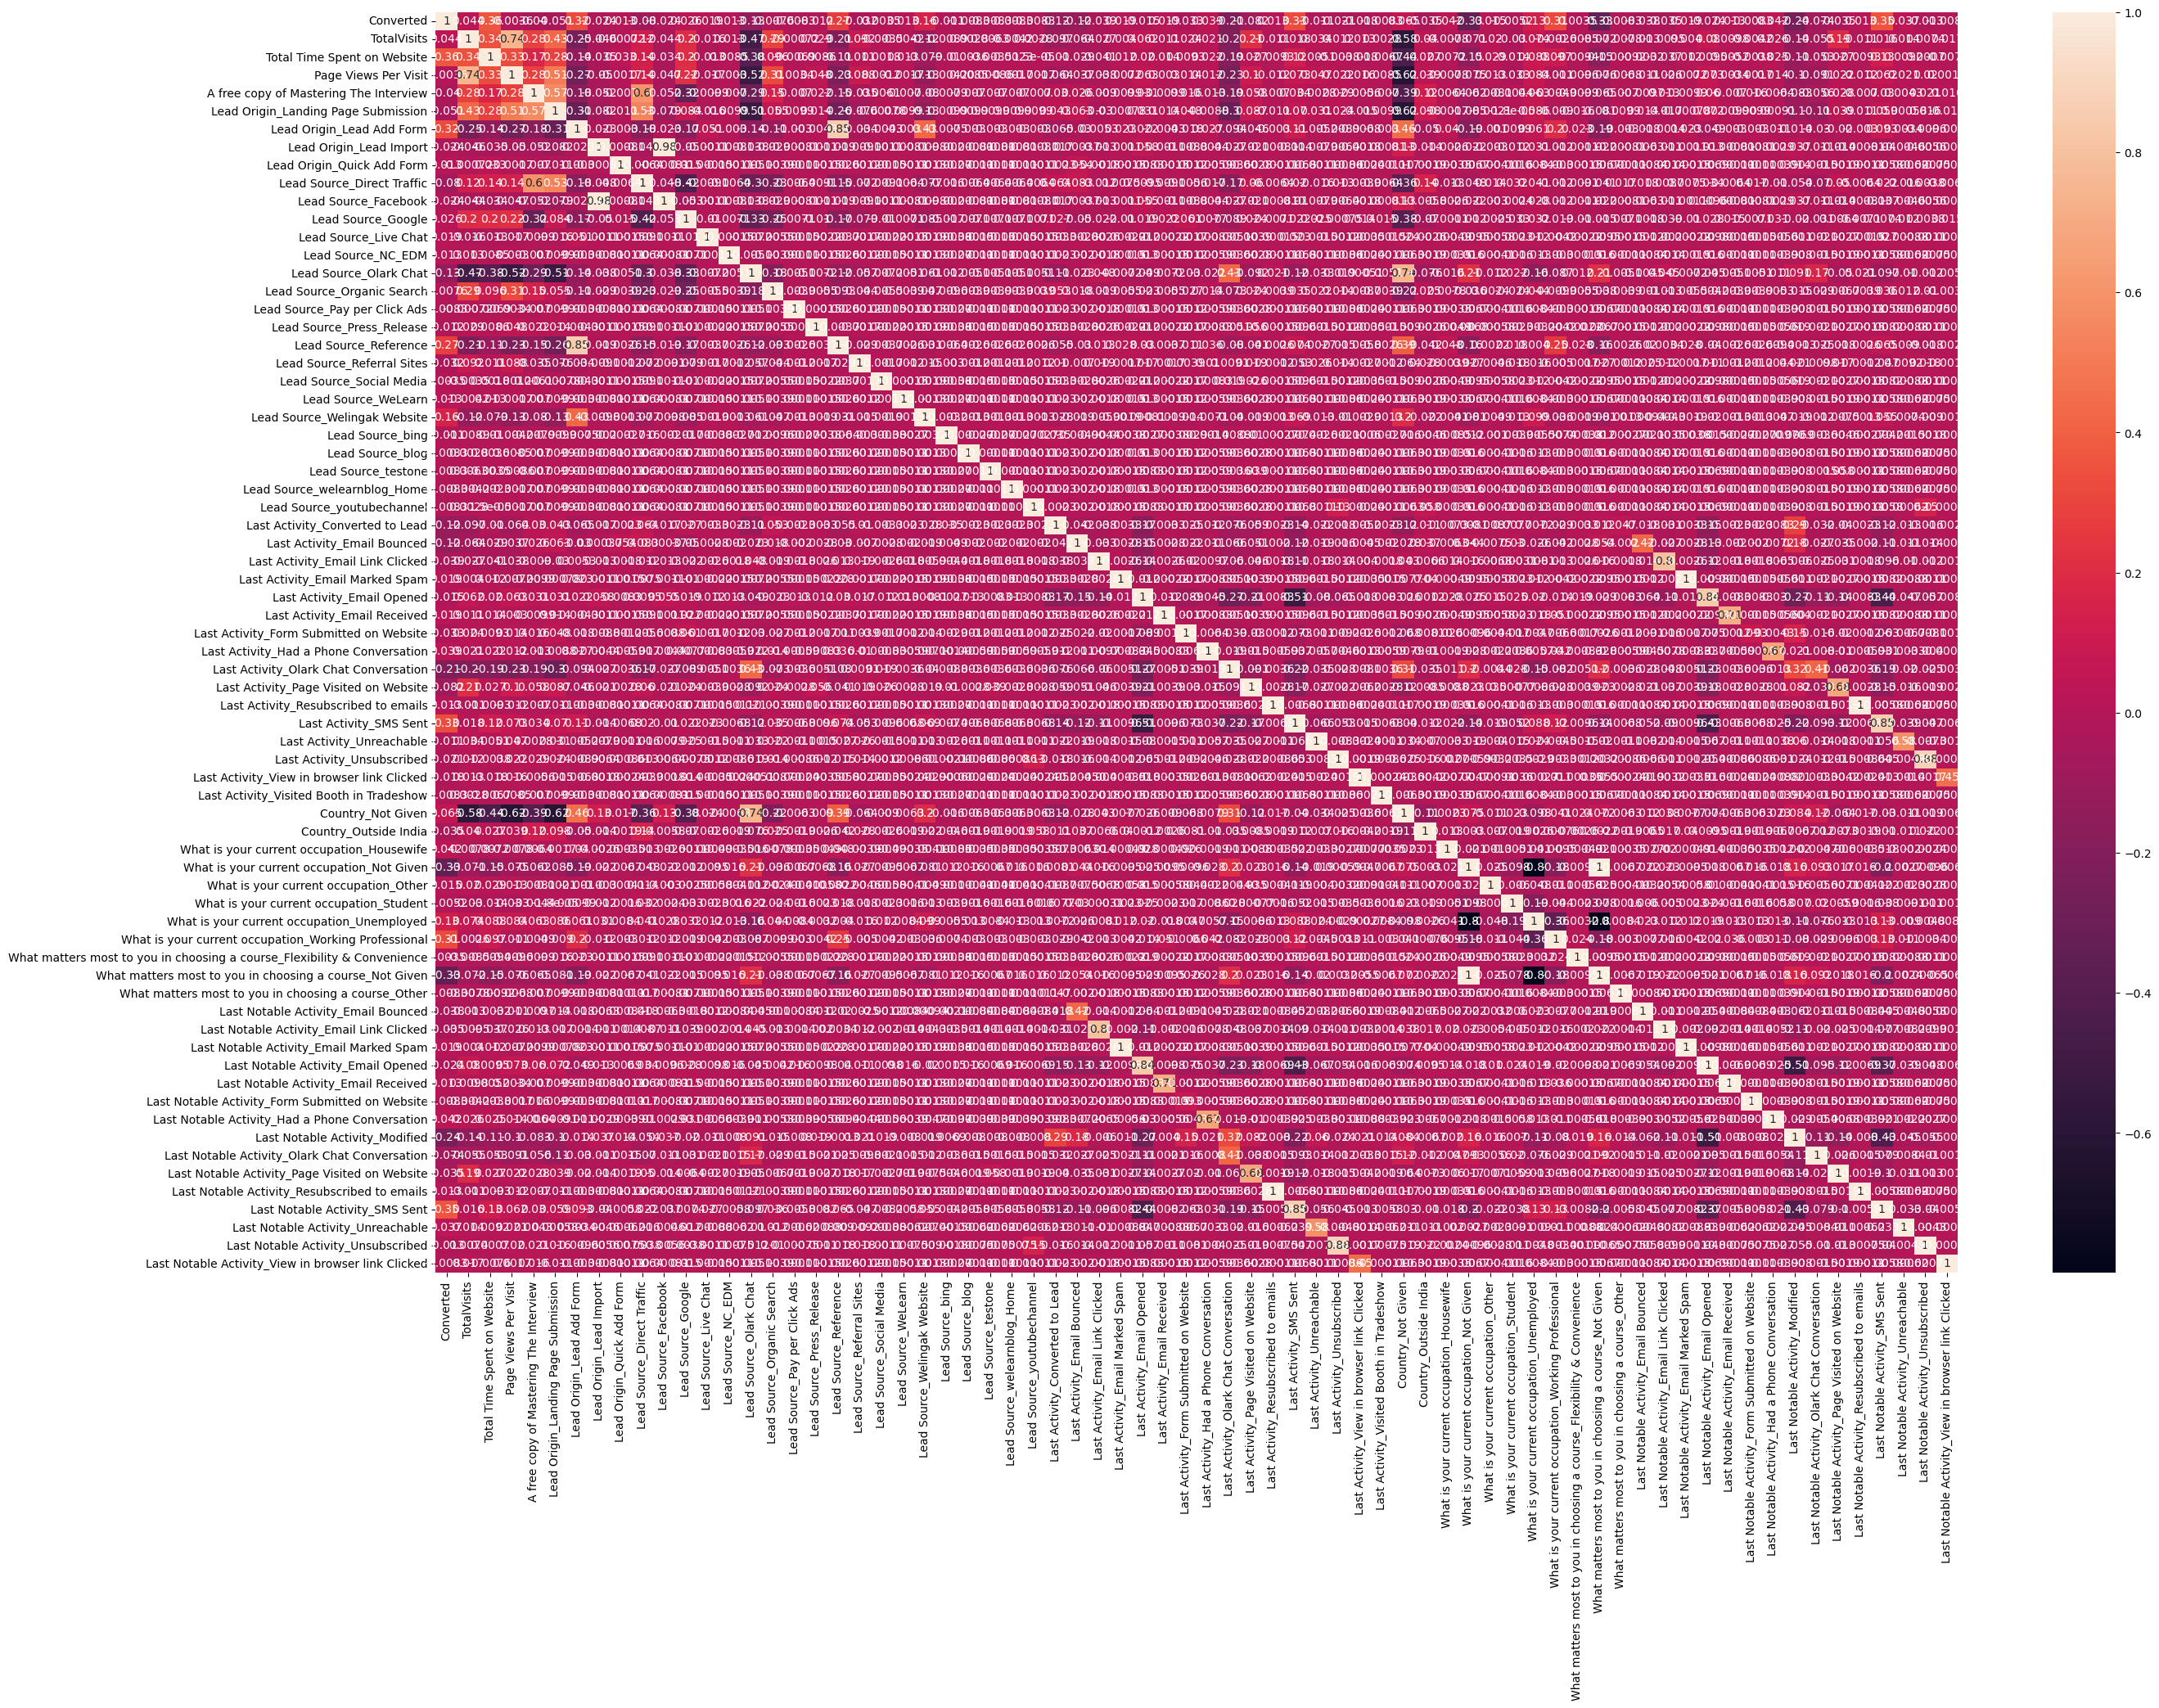

In [44]:
plt.figure(figsize=(30,20))

sns.heatmap(Ls_data_1.corr(), annot=True)
plt.show()

### Observations:
- Since there are lot of variable present in the dataframe, its hard to clearly see which are heigly correlated even though we can see correlation in the above chart, we will not drop these variable right now and will drop these during model building process using RFE method.

#

## 6. Building Model

In [45]:
import statsmodels.api as sm

In [46]:
# building Logistic regression model 
logml = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.7
Date:                Sun, 15 Dec 2024   Deviance:                       5049.5
Time:                        16:28:14   Pearson chi2:                 6.78e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4212
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      46.9081   1.53e+05      0.000      1.000      -3e+05       3e+05
TotalVisits                                                                 0.2797      0.055      5.058      0.000       0.171       0.388
Total Time Spent on Website                                                 1.1294      0.042     26.883      0.000       1.047       1.212
Page Views Per Visit                                                       -0.2122      0.058     -3.688      0.000      -0.325      -0.099
A free copy of Mastering The Interview                                     -0.0281      0.112     -0.251      0.802      -0.247       0.191
Lead Origin_Landing Page Submission                                        -0.1803      0.111     -1.623      0.105      -0.398       0.037
Lead Origin_Lead Add Form                                                   2.1863      0.630      3.468      0.001       0.951       3.422
Lead Origin_Lead Import                                                    24.5722   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Quick Add Form                                                 23.3297   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                                                -22.9994    7.9e+04     -0.000      1.000   -1.55e+05    1.55e+05
Lead Source_Facebook                                                      -47.3216   1.53e+05     -0.000      1.000      -3e+05       3e+05
Lead Source_Google                                                        -22.6132    7.9e+04     -0.000      1.000   -1.55e+05    1.55e+05
Lead Source_Live Chat                                                      -0.2908   1.22e+05  -2.39e-06      1.000   -2.39e+05    2.39e+05
Lead Source_NC_EDM                                                          2.6854   1.53e+05   1.76e-05      1.000      -3e+05       3e+05
Lead Source_Olark Chat                                                    -21.8647    7.9e+04     -0.000      1.000   -1.55e+05    1.55e+05
Lead Source_Organic Search                                                -22.8258    7.9e+04     -0.000      1.000   -1.55e+05    1.55e+05
Lead Source_Pay per Click Ads                                             -45.5093   1.53e+05     -0.000      1.000      -3e+05       3e+05
Lead Source_Press_Release                                                 -45.3426   1.21e+05     -0.000      1.000   -2.37e+05    2.37e+05
Lead Source_Reference                                                     -22.0178    7.9e+04     -0.000      1.000   -1.55e+05    1.55e+05
Lea

#### - from the above model we can see there are lot lot of variable which have P value of absolute 1. in this case we will use RFE approch to filter out these column and remove feature which are not of high significance or importance. we will select top 15 feature using rfe

### Feature selection using RFE

In [47]:
# importing library and initializing the object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [49]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False])

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 15),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 10),
 ('Lead Source_WeLearn', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 25),
 ('Lead Source_blog', False, 34),
 ('Lead Source_testo

In [51]:
col = X_train.columns[rfe.support_]
print(col)
# creating a dataframe with RFE selected feature 
X_train_rfe = X_train[col]

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Not Given', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Not Given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


### Model 1
`- Dropping RFE selected feature from model` 

In [52]:
X_train_sm = sm.add_constant(X_train_rfe)
logml1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res1 = logml1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.2
Date:                Sun, 15 Dec 2024   Deviance:                       5244.4
Time:                        16:28:19   Pearson chi2:                 6.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.1070      0.057    -19.519      0.000      -1.218      -0.996
Total Time Spent on Website                                                 1.1418      0.041     27.869      0.000       1.061       1.222
Lead Origin_Lead Add Form                                                   1.9843      0.208      9.527      0.000       1.576       2.392
Lead Source_Facebook                                                       -1.1207      0.415     -2.700      0.007      -1.934      -0.307
Lead Source_Welingak Website                                                1.9604      0.751      2.611      0.009       0.489       3.432
Last Activity_Converted to Lead                                            -1.3631      0.227     -6.007      0.000      -1.808      -0.918
Last Activity_Email Bounced                                                -1.9733      0.313     -6.314      0.000      -2.586      -1.361
Last Activity_Olark Chat Conversation                                      -1.3758      0.167     -8.259      0.000      -1.702      -1.049
Last Activity_SMS Sent                                                      1.1665      0.075     15.610      0.000       1.020       1.313
Country_Not Given                                                           1.5218      0.106     14.367      0.000       1.314       1.729
What is your current occupation_Housewife                                  22.0762   1.67e+04      0.001      0.999   -3.26e+04    3.27e+04
What is your current occupation_Working Professional                        2.4229      0.184     13.148      0.000       2.062       2.784
What matters most to you in choosing a course_Flexibility & Convenience   -26.9539   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What matters most to you in choosing a course_Not Given                    -1.3186      0.087    -15.090      0.000      -1.490      -1.147
Last Notable Activity_Had a Phone Conversation                              3.6188      1.119      3.233      0.001       1.425       5.813
Last Notable Activity_Unreachable                                           1.5469      0.571      2.711      0.007       0.428       2.665
===========================================================================================================================================
"""

- so from the model output above we still see that there are some fetaure which still have pretty high P values. we will use VIF method to find collinarity for these feature and drop these feature variable one by one to fine tune the model

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

Features   VIF
8                                   Country_Not Given  2.31
1                           Lead Origin_Lead Add Form  1.85
6               Last Activity_Olark Chat Conversation  1.40
12  What matters most to you in choosing a course_...  1.31
0                         Total Time Spent on Website  1.25
3                        Lead Source_Welingak Website  1.25
7                              Last Activity_SMS Sent  1.23
10  What is your current occupation_Working Profes...  1.17
2                                Lead Source_Facebook  1.04
5                         Last Activity_Email Bounced  1.03
4                     Last Activity_Converted to Lead  1.02
9           What is your current occupation_Housewife  1.00
11  What matters most to you in choosing a course_...  1.00
13     Last Notable Activity_Had a Phone Conversation  1.00
14                  Last Notable Activity_Unreachable  1.00

#### VIF seems to be under limit for all the feature. so lets just remove feature which has heighest P values one by one

### Model 2
`- Dropping What matters most to you in choosing a course_Flexibility & Convenience feature from model` 

In [54]:
X_train_rfe.drop(['What matters most to you in choosing a course_Flexibility & Convenience'], axis=1, inplace=True)

In [55]:
X_train_sm = sm.add_constant(X_train_rfe)
logml2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res2 = logml2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.6
Date:                Sun, 15 Dec 2024   Deviance:                       5253.2
Time:                        16:28:19   Pearson chi2:                 6.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.1056      0.057    -19.509      0.000      -1.217      -0.995
Total Time Spent on Website                                 1.1408      0.041     27.867      0.000       1.061       1.221
Lead Origin_Lead Add Form                                   1.9500      0.206      9.462      0.000       1.546       2.354
Lead Source_Facebook                                       -1.1196      0.415     -2.699      0.007      -1.933      -0.306
Lead Source_Welingak Website                                1.9938      0.750      2.658      0.008       0.524       3.464
Last Activity_Converted to Lead                            -1.3606      0.227     -6.002      0.000      -1.805      -0.916
Last Activity_Email Bounced                                -1.9697      0.312     -6.315      0.000      -2.581      -1.358
Last Activity_Olark Chat Conversation                      -1.3738      0.166     -8.255      0.000      -1.700      -1.048
Last Activity_SMS Sent                                      1.1675      0.075     15.638      0.000       1.021       1.314
Country_Not Given                                           1.5197      0.106     14.356      0.000       1.312       1.727
What is your current occupation_Housewife                  22.0856   1.67e+04      0.001      0.999   -3.27e+04    3.27e+04
What is your current occupation_Working Professional        2.3914      0.183     13.100      0.000       2.034       2.749
What matters most to you in choosing a course_Not Given    -1.3197      0.087    -15.105      0.000      -1.491      -1.148
Last Notable Activity_Had a Phone Conversation              3.6174      1.119      3.232      0.001       1.423       5.811
Last Notable Activity_Unreachable                           1.5485      0.570      2.716      0.007       0.431       2.666
===========================================================================================================================
"""

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

Features   VIF
8                                   Country_Not Given  2.31
1                           Lead Origin_Lead Add Form  1.85
6               Last Activity_Olark Chat Conversation  1.40
11  What matters most to you in choosing a course_...  1.31
0                         Total Time Spent on Website  1.25
3                        Lead Source_Welingak Website  1.25
7                              Last Activity_SMS Sent  1.23
10  What is your current occupation_Working Profes...  1.16
2                                Lead Source_Facebook  1.04
5                         Last Activity_Email Bounced  1.03
4                     Last Activity_Converted to Lead  1.02
9           What is your current occupation_Housewife  1.00
12     Last Notable Activity_Had a Phone Conversation  1.00
13                  Last Notable Activity_Unreachable  1.00

### Model 3
`- Dropping What is your current occupation_Housewife from model` 

In [57]:
X_train_rfe.drop(['What is your current occupation_Housewife'], axis=1, inplace=True)

In [58]:
X_train_sm = sm.add_constant(X_train_rfe)
logml3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res3 = logml3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.1
Date:                Sun, 15 Dec 2024   Deviance:                       5260.1
Time:                        16:28:19   Pearson chi2:                 6.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.0995      0.057    -19.442      0.000      -1.210      -0.989
Total Time Spent on Website                                 1.1413      0.041     27.907      0.000       1.061       1.221
Lead Origin_Lead Add Form                                   1.9789      0.206      9.610      0.000       1.575       2.382
Lead Source_Facebook                                       -1.1170      0.415     -2.693      0.007      -1.930      -0.304
Lead Source_Welingak Website                                1.9666      0.750      2.622      0.009       0.496       3.437
Last Activity_Converted to Lead                            -1.3661      0.227     -6.027      0.000      -1.810      -0.922
Last Activity_Email Bounced                                -1.9758      0.312     -6.329      0.000      -2.588      -1.364
Last Activity_Olark Chat Conversation                      -1.3753      0.166     -8.263      0.000      -1.702      -1.049
Last Activity_SMS Sent                                      1.1624      0.075     15.576      0.000       1.016       1.309
Country_Not Given                                           1.5139      0.106     14.325      0.000       1.307       1.721
What is your current occupation_Working Professional        2.3868      0.183     13.073      0.000       2.029       2.745
What matters most to you in choosing a course_Not Given    -1.3219      0.087    -15.134      0.000      -1.493      -1.151
Last Notable Activity_Had a Phone Conversation              3.6121      1.119      3.227      0.001       1.418       5.806
Last Notable Activity_Unreachable                           1.5436      0.570      2.706      0.007       0.426       2.662
===========================================================================================================================
"""

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

Features   VIF
8                                   Country_Not Given  2.31
1                           Lead Origin_Lead Add Form  1.84
6               Last Activity_Olark Chat Conversation  1.40
10  What matters most to you in choosing a course_...  1.31
0                         Total Time Spent on Website  1.25
3                        Lead Source_Welingak Website  1.25
7                              Last Activity_SMS Sent  1.23
9   What is your current occupation_Working Profes...  1.16
2                                Lead Source_Facebook  1.04
5                         Last Activity_Email Bounced  1.03
4                     Last Activity_Converted to Lead  1.02
11     Last Notable Activity_Had a Phone Conversation  1.00
12                  Last Notable Activity_Unreachable  1.00

### Model 4
`- Dropping 'Last Notable Activity_Unreachable' from model` 

In [60]:
X_train_rfe.drop(['Last Notable Activity_Unreachable'], axis=1, inplace=True)

In [61]:
X_train_sm = sm.add_constant(X_train_rfe)
logml4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res4 = logml4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.8
Date:                Sun, 15 Dec 2024   Deviance:                       5267.7
Time:                        16:28:19   Pearson chi2:                 6.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4012
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.0889      0.056    -19.334      0.000      -1.199      -0.979
Total Time Spent on Website                                 1.1403      0.041     27.910      0.000       1.060       1.220
Lead Origin_Lead Add Form                                   1.9855      0.206      9.649      0.000       1.582       2.389
Lead Source_Facebook                                       -1.1206      0.415     -2.702      0.007      -1.933      -0.308
Lead Source_Welingak Website                                1.9558      0.750      2.607      0.009       0.486       3.426
Last Activity_Converted to Lead                            -1.3767      0.227     -6.075      0.000      -1.821      -0.933
Last Activity_Email Bounced                                -1.9858      0.312     -6.362      0.000      -2.598      -1.374
Last Activity_Olark Chat Conversation                      -1.3852      0.166     -8.326      0.000      -1.711      -1.059
Last Activity_SMS Sent                                      1.1515      0.074     15.464      0.000       1.006       1.297
Country_Not Given                                           1.5105      0.106     14.307      0.000       1.304       1.717
What is your current occupation_Working Professional        2.3903      0.183     13.090      0.000       2.032       2.748
What matters most to you in choosing a course_Not Given    -1.3183      0.087    -15.107      0.000      -1.489      -1.147
Last Notable Activity_Had a Phone Conversation              3.6001      1.119      3.217      0.001       1.406       5.794
===========================================================================================================================
"""

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

Features   VIF
8                                   Country_Not Given  2.31
1                           Lead Origin_Lead Add Form  1.84
6               Last Activity_Olark Chat Conversation  1.40
10  What matters most to you in choosing a course_...  1.31
0                         Total Time Spent on Website  1.25
3                        Lead Source_Welingak Website  1.25
7                              Last Activity_SMS Sent  1.23
9   What is your current occupation_Working Profes...  1.16
2                                Lead Source_Facebook  1.04
5                         Last Activity_Email Bounced  1.03
4                     Last Activity_Converted to Lead  1.02
11     Last Notable Activity_Had a Phone Conversation  1.00

#### so now we have all the P values under <0.05 and VIF under 5. So we can conclude that this is good model and we can use it for predictions.

## Predicing values using model 4

In [63]:
# predicting values on the train set using the model 4
y_train_pred = res4.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.03187552, 0.35506711, 0.4783306 , 0.14589561, 0.30742791])

#### Creating a data frame with actual converted vs predicted converted 

In [64]:
y_train_pred_final  = pd.DataFrame({'Converted':y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['cust ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  cust ID
0          0        0.031876     6490
1          1        0.355067     4026
2          1        0.478331     6453
3          1        0.145896     8949
4          0        0.307428     6467

#### Creating new column called Predicted  with 1 if converted_prob>.5 else 0 

In [65]:
# using threshold of .5 to convert predicted values in 0 and 1 for further analysis 
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  cust ID  Predicted
0          0        0.031876     6490          0
1          1        0.355067     4026          0
2          1        0.478331     6453          0
3          1        0.145896     8949          0
4          0        0.307428     6467          0

#

## 7. Model Evaluation

#### Now that we have a model and we have predicted values using the model lets move to evaulation of the predictions made by this model. we will check various metrics along with accuracy to evaluate the model

In [66]:
# confusion Metrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3492  437]
 [ 737 1743]]


In [67]:
# lets check the overall accuracy
print('Accuracy:', round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2))

Accuracy: 0.82


#### So we have around 82% of accuray with the model 4. Accuracy is not sufficient to give go ahead to the model. 
Lets check other metric beyong accuracy

In [68]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [69]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:', round(TP / float(TP+FN),2))

Sensitivity: 0.7


In [70]:
# Let us calculate specificity
print('Specificity:', round(TN / float(TN+FP),2))

Specificity: 0.89


In [71]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("Flase Positive Rate: ", round(FP/ float(TN+FP),2))

Flase Positive Rate:  0.11


In [72]:
# Positive predictive value 
print ('Positive Predictive Value:', round(TP / float(TP+FP),2))

Positive Predictive Value: 0.8


In [73]:
# Negative predictive value
print ('Negative Predictive Value:', round(TN / float(TN+ FN),2))

Negative Predictive Value: 0.83


### Model Evaluation Observations:
- Accuracy: 82%
- Sesitivity: 70%
- Specificity: 88%
- Positive Predition: 80%
- Negative Positive Prediction: 83%



## Plotting ROC Curve

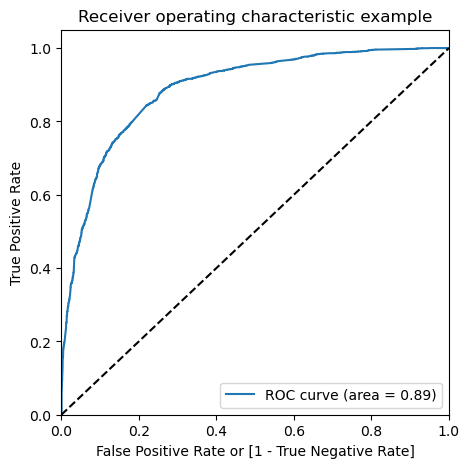

In [74]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

In [75]:
# lets create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

Converted  Converted_prob  cust ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.031876     6490          0    1    0    0    0    0   
1          1        0.355067     4026          0    1    1    1    1    0   
2          1        0.478331     6453          0    1    1    1    1    1   
3          1        0.145896     8949          0    1    1    0    0    0   
4          0        0.307428     6467          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [76]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df.head())


     prob  accuracy     sensi     speci
0.0   0.0  0.386956  1.000000  0.000000
0.1   0.1  0.594477  0.979435  0.351489
0.2   0.2  0.759869  0.918145  0.659964
0.3   0.3  0.794820  0.885484  0.737592
0.4   0.4  0.815104  0.770968  0.842963


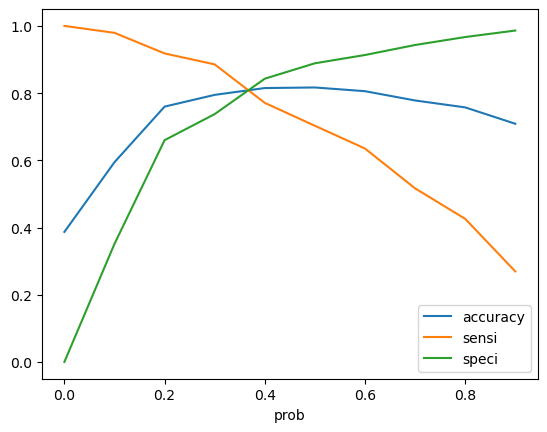

In [77]:
# lets plot the various possibilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

#### from the curve above 0.4 is the optimum cutoff point to take it as a cutoff probability

In [78]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [79]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion2)

[[3312  617]
 [ 568 1912]]


In [80]:
# lets check the overall accuracy
print('Accuracy:', round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2))

Accuracy: 0.82


In [81]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:', round(TP / float(TP+FN),2))

Sensitivity: 0.77


In [83]:
# Let us calculate specificity
print('Specificity:', round(TN / float(TN+FP),2))

Specificity: 0.84


In [84]:
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate:', round(FP/ float(TN+FP),2))

False Positive Rate: 0.16


In [85]:
# Positive predictive value 
print ('Positive Predictive Value:', round(TP / float(TP+FP),2))

Positive Predictive Value: 0.76


In [86]:
# Negative predictive value
print ('Negative Predictive Value:', round(TN / float(TN+ FN),2))

Negative Predictive Value: 0.85


### Precision and Recall

In [87]:
# Precision (tp/tp+fp)
print('Precision:', round(TP/float(TP+FP),2))

Precision: 0.76


In [88]:
# recall (TP/TP+FN)
print('Recall:', round(TP/float(TP+FN),2))

Recall: 0.77


### Precision and recall tradeoff

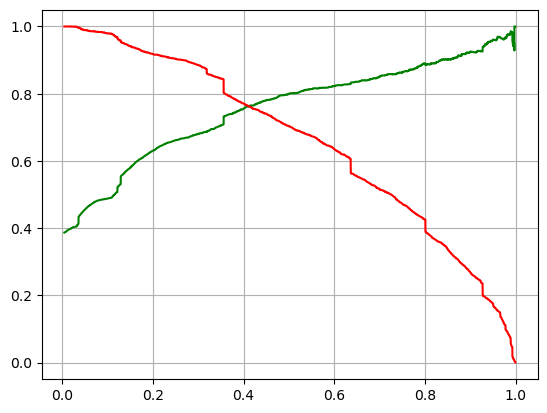

In [89]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

#### So the trade off cutoff is around .4. we have already calculated accuracy, specifity, sensitivity, precision and recall.
- our model is giving an accuracy of around 82%
- sensitivity of model is 77%
- specificity of model is 84%
so we can conclude is our model is giving good enough result for this analysis and we can move on to making predictions on the test data set

## 8. Making Predictions on the test set

In [90]:
# feature scaling on test data
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head(2)

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7359    -0.066370                    -0.209813              0.339519   
2201     0.605399                    -0.649354              0.090184   

      A free copy of Mastering The Interview  \
7359                                       1   
2201                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7359                                    1                          0   
2201                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
7359                        0                           0   
2201                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
7359                           1                     0                   0   
2201                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
7359                      0                   0                       0   
2201                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
7359                           0                              0   
2201                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
7359                          0                      0   
2201                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
7359                           0                         0   
2201                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
7359                    0                             0                 0   
2201                    0                             0                 0   

      Lead Source_blog  Lead Source_testone  Lead Source_welearnblog_Home  \
7359                 0                    0                             0   
2201                 0                    0                             0   

      Lead Source_youtubechannel  Last Activity_Converted to Lead  \
7359                           0                                0   
2201                           0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7359                            0                                 0   
2201                            0                                 0   

      Last Activity_Email Marked Spam  Last Activity_Email Opened  \
7359                                0                           0   
2201                                0                           0   

      Last Activity_Email Received  Last Activity_Form Submitted on Website  \
7359                             0                                        0   
2201                             0                                        0   

      Last Activity_Had a Phone Conversation  \
7359                                       0   
2201                                       0   

      Last Activity_Olark Chat Conversation  \
7359                                      0   
2201                                      1   

      Last Activity_Page Visited on Website  \
7359                                      0   
2201                                      0   

      Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
7359                                     0                       1   
2201                                     0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
7359                          0                           0   
2201                          0                           0   

      Last Activity_View in browser link Clicked  \
7359

In [91]:
# removing the columns from test data which we removed in train data during model building process
X_test = X_test[col]

In [92]:
X_test.drop(['What matters most to you in choosing a course_Flexibility & Convenience','What is your current occupation_Housewife','Last Notable Activity_Unreachable'], axis=1, inplace=True)

In [93]:
X_test_sm = sm.add_constant(X_test)

### making predictions on the test data set

In [94]:
y_test_pred = res4.predict(X_test_sm)
y_test_pred[:5]

7359    0.455945
2201    0.038620
2473    0.984005
8388    0.038785
2949    0.046329
dtype: float64

In [95]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head(2)

0
7359  0.455945
2201  0.038620

In [96]:
# converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [97]:
#putting 'Cust ID' to index
y_test_df['Cust ID'] = y_test_df.index

In [98]:
# removing index from both the dataframs to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
#appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

Converted  Cust ID         0
0          0     7359  0.455945
1          0     2201  0.038620
2          1     2473  0.984005
3          0     8388  0.038785
4          0     2949  0.046329

In [100]:
# renaming the column 
y_pred_final = y_pred_final.rename(columns={0:'Converted_prob'})

In [101]:
#rearranging the columns
y_pred_final = y_pred_final.reindex(['Cust ID', 'Converted', 'Converted_prob'], axis=1)
y_pred_final.head()

Cust ID  Converted  Converted_prob
0     7359          0        0.455945
1     2201          0        0.038620
2     2473          1        0.984005
3     8388          0        0.038785
4     2949          0        0.046329

In [102]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x:1 if x>=.4 else 0)
y_pred_final.head()

Cust ID  Converted  Converted_prob  final_predicted
0     7359          0        0.455945                1
1     2201          0        0.038620                0
2     2473          1        0.984005                1
3     8388          0        0.038785                0
4     2949          0        0.046329                0

In [103]:
#lets check accuracy
print('Test_Accuracy:', round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2))

Test_Accuracy: 0.81


In [104]:
confusion_pred = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion_pred

array([[1431,  272],
       [ 260,  785]], dtype=int64)

In [105]:
TP = confusion_pred[1,1] # true positive 
TN = confusion_pred[0,0] # true negatives
FP = confusion_pred[0,1] # false positives
FN = confusion_pred[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
print('Test_Sensitivity:', round(TP / float(TP+FN),2))

Test_Sensitivity: 0.75


In [107]:
# Let us calculate specificity
print('Test_Specificity:', round(TN / float(TN+FP),2))

Test_Specificity: 0.84


### Test Data Evaluation Observations:
- with model4 and a cutoff of .4 we see that model is working quite good and is par with our expectations of getting 80% accuracy. below are the metrics we got on test data
- Accuracy: 81%
- sensitivity: 75%
- specificity: 84%

#

# Conclusion:
#### By forming the above analysis and looking at the result of various metric on test and train data we can conclude that model is performing quite well. It is consistent on Test and Train data which shows that model is not overfitting or underfitting. Below are the main features that can help the Institute to target the potential customer to increase leads.
Institute can target user who 
- Have spend more time on Website
- Lead origin from Lead add form
- lead source from welingak website
- last activity as SMS 
- User who are working profession 
- User who responded to phone conversations